In [3]:
import pandas as pd
import numpy as np
#use kernel: brainrender-env


In [4]:
# MANUAL IMPUT
csv_file = "/run/user/1000/gvfs/smb-share:server=upcourtinenas,share=cervical/CERVICAL_ID/Gabriele/583/all_xls_synapses/whole_brain.csv"
brain_id = "587"

# EDA

In [5]:
# Sample data creation (assuming you have a CSV file or DataFrame)
df = pd.read_csv(csv_file)

# Display the first few rows of the DataFrame
print(df.head())

             ROI  Synapses  Area
0     Left: FRP1         0   0.0
1    Right: FRP1         0   0.0
2   Left: FRP2/3         0   0.0
3  Right: FRP2/3         0   0.0
4     Left: FRP5         0   0.0


In [6]:
# Calculate cell density (Synapses per Unit Area)
df['Cell Density'] = df['Synapses'] / df['Area']

# Display the DataFrame with the new column
print("\nDataFrame with Cell Density:\n", df.head())


DataFrame with Cell Density:
              ROI  Synapses  Area  Cell Density
0     Left: FRP1         0   0.0           NaN
1    Right: FRP1         0   0.0           NaN
2   Left: FRP2/3         0   0.0           NaN
3  Right: FRP2/3         0   0.0           NaN
4     Left: FRP5         0   0.0           NaN


In [7]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Handle missing values if necessary
df = df.fillna(0)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())




Missing Values:
 ROI                0
Synapses           0
Area               0
Cell Density    1728
dtype: int64

Missing Values:
 ROI             0
Synapses        0
Area            0
Cell Density    0
dtype: int64


In [8]:
# Summary statistics
summary_stats = df.describe()
print("\nSummary Statistics:\n", summary_stats)



Summary Statistics:
           Synapses          Area  Cell Density
count  2076.000000  2.076000e+03   2076.000000
mean     16.404624  2.206194e+04      0.000119
std     137.642807  8.430272e+04      0.000608
min       0.000000  0.000000e+00      0.000000
25%       0.000000  0.000000e+00      0.000000
50%       0.000000  0.000000e+00      0.000000
75%       0.000000  0.000000e+00      0.000000
max    3825.000000  1.484763e+06      0.009675


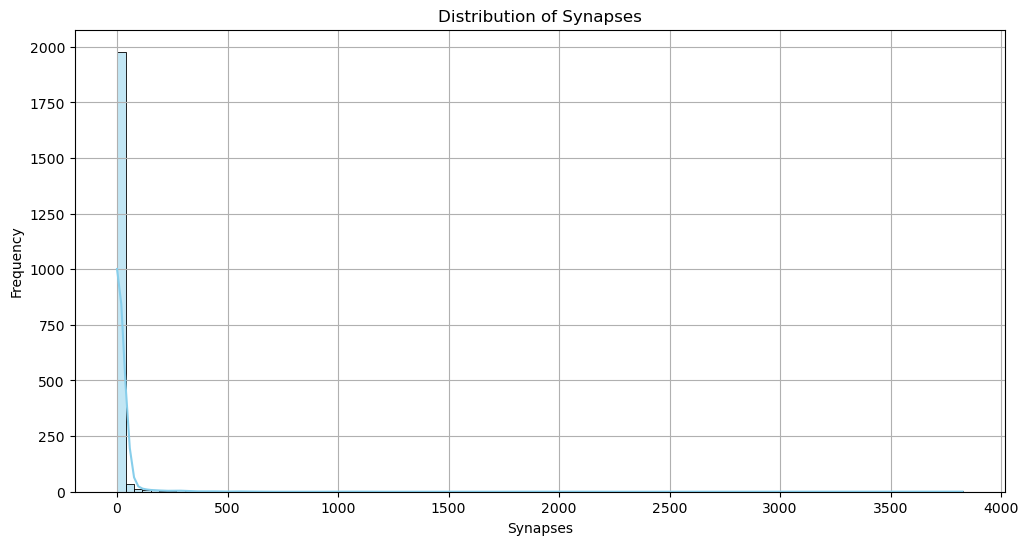

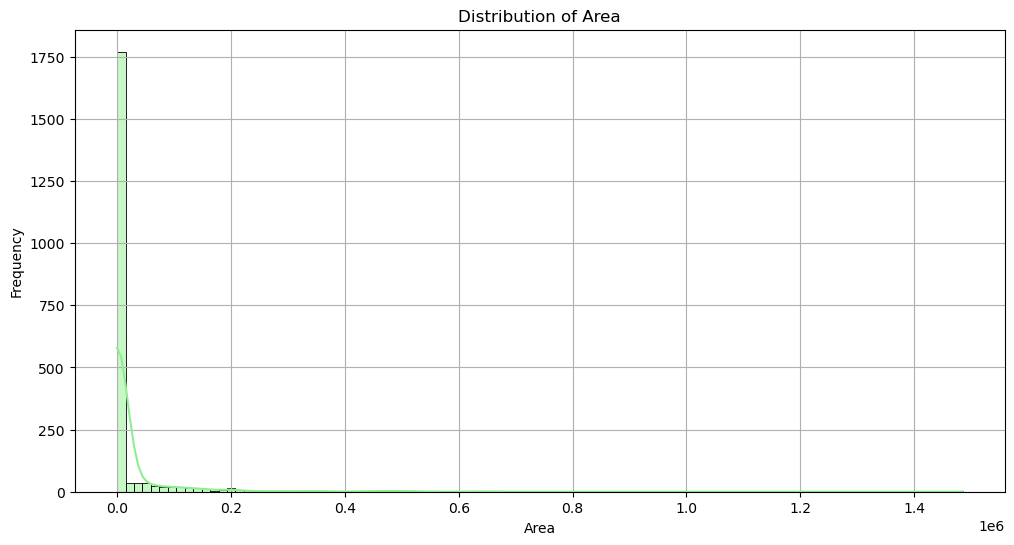

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Synapses
plt.figure(figsize=(12, 6))
sns.histplot(df['Synapses'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Synapses')
plt.xlabel('Synapses')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram for Area
plt.figure(figsize=(12, 6))
sns.histplot(df['Area'], bins=100, kde=True, color='lightgreen')
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


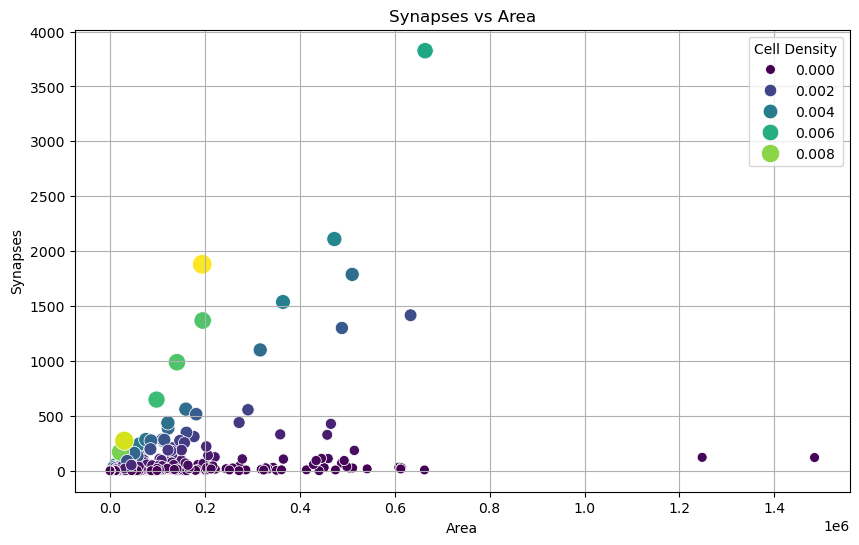

In [30]:
# Scatter plot for Synapses vs Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Synapses', data=df, hue='Cell Density', palette='viridis', size='Cell Density', sizes=(50, 200))
plt.title('Synapses vs Area')
plt.xlabel('Area')
plt.ylabel('Synapses')
plt.grid(True)
#plt.colorbar(label='Cell Density')
plt.show()


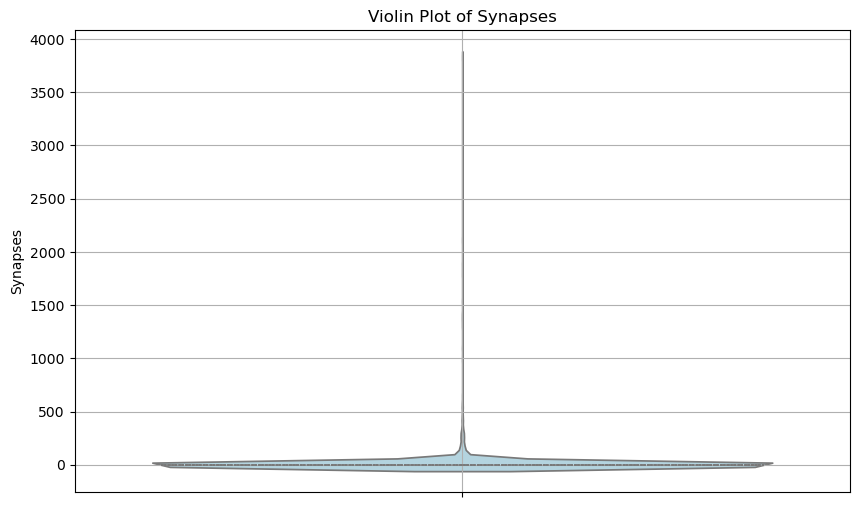

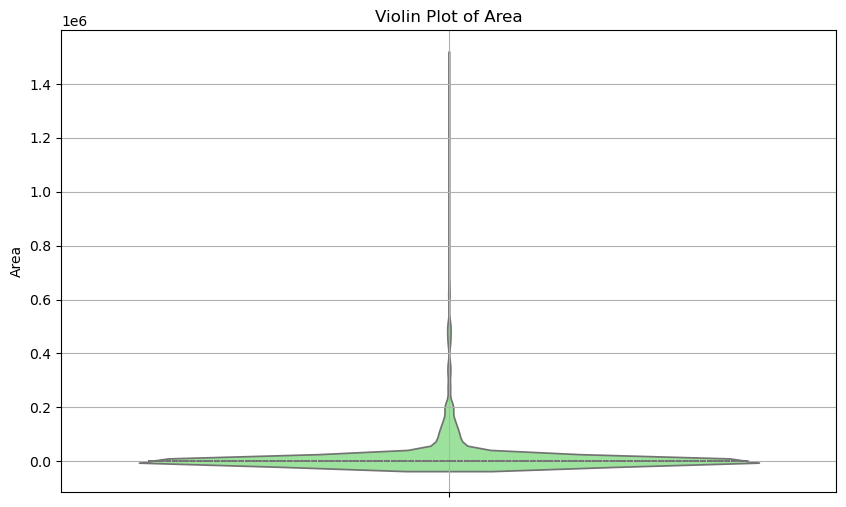

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot for Synapses
plt.figure(figsize=(10, 6))
sns.violinplot(y='Synapses', data=df, inner='quartile', color='lightblue')
plt.title('Violin Plot of Synapses')
plt.ylabel('Synapses')
plt.grid(True)
plt.show()

# Violin plot for Area
plt.figure(figsize=(10, 6))
sns.violinplot(y='Area', data=df, inner='quartile', color='lightgreen')
plt.title('Violin Plot of Area')
plt.ylabel('Area')
plt.grid(True)
plt.show()



/home/gabri/mambaforge/envs/brainrender-env/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/home/gabri/mambaforge/envs/brainrender-env/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/home/gabri/mambaforge/envs/brainrender-env/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



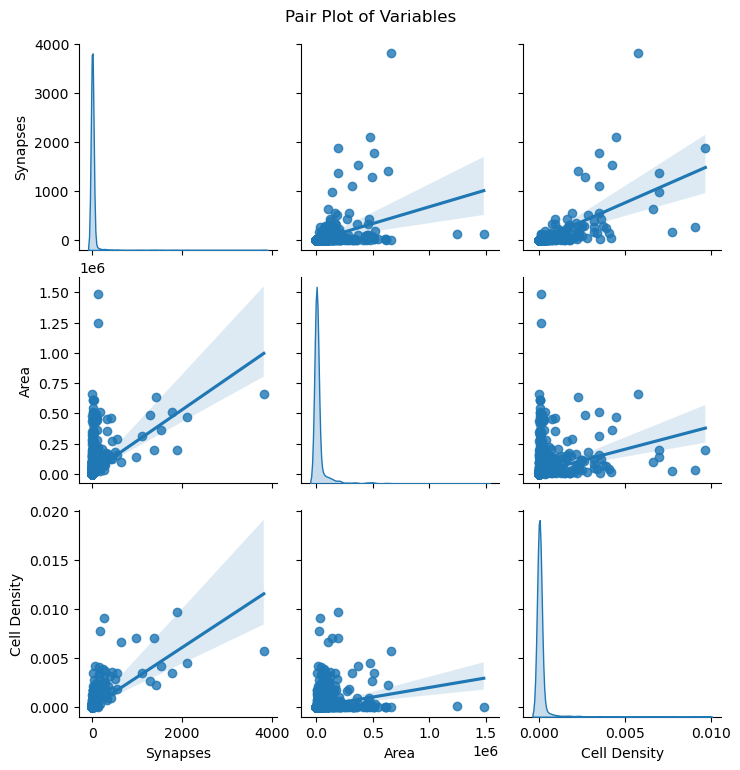

In [32]:
# Pair plot for all variables
sns.pairplot(df, kind='reg', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()



Correlation Matrix:
               Synapses      Area  Cell Density
Synapses      1.000000  0.417654      0.679179
Area          0.417654  1.000000      0.269205
Cell Density  0.679179  0.269205      1.000000


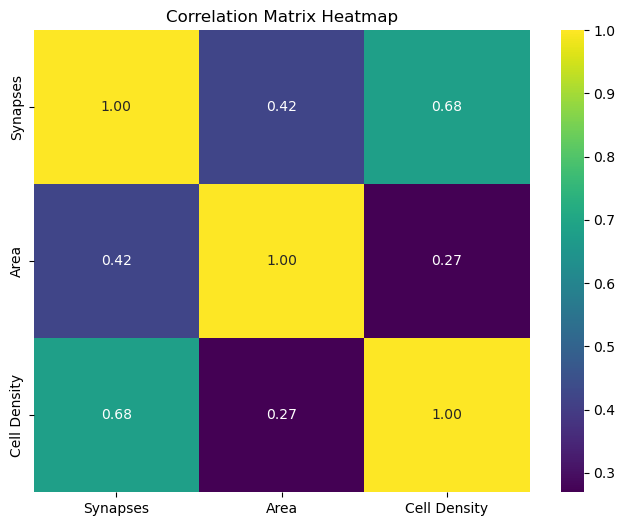

In [33]:
# Correlation matrix
correlation_matrix = df[['Synapses', 'Area', 'Cell Density']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()



Linear Regression Results:
Slope (Coefficient): 0.00
Intercept: 1.36


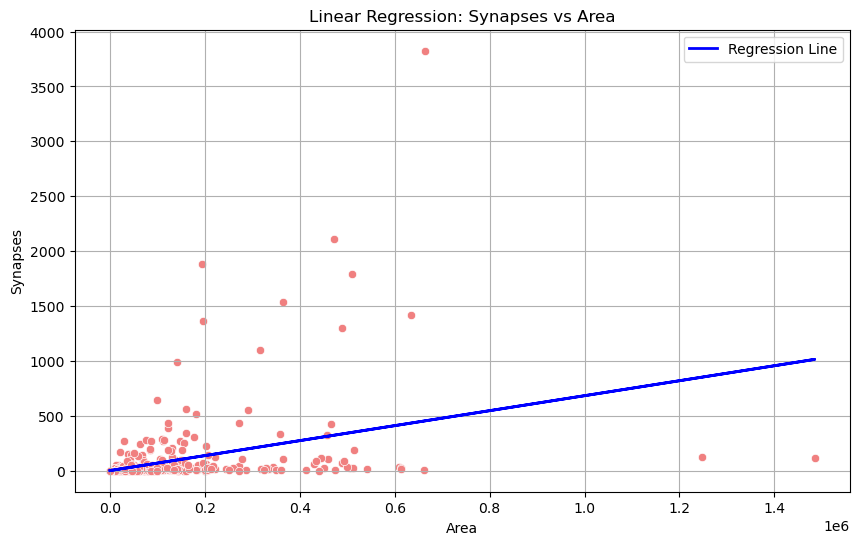

In [34]:
from sklearn.linear_model import LinearRegression

# Prepare data for regression
X = df[['Area']].values  # Independent variable
y = df['Synapses'].values  # Dependent variable

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_

print("\nLinear Regression Results:")
print(f"Slope (Coefficient): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

# Plotting the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Synapses', data=df, color='lightcoral')
plt.plot(df['Area'], model.predict(X), color='blue', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Synapses vs Area')
plt.xlabel('Area')
plt.ylabel('Synapses')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
import plotly.express as px

# 3D Scatter Plot for Synapses, Area, and Cell Density
fig = px.scatter_3d(df, x='Area', y='Synapses', z='Cell Density',
                    color='ROI', size='Synapses',
                    labels={'Area':'Area', 'Synapses':'Synapses', 'Cell Density':'Cell Density'},
                    title='3D Scatter Plot of Cells, Area, and Density')
fig.update_traces(marker=dict(size=8))
fig.show()


/tmp/ipykernel_22933/3480394463.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




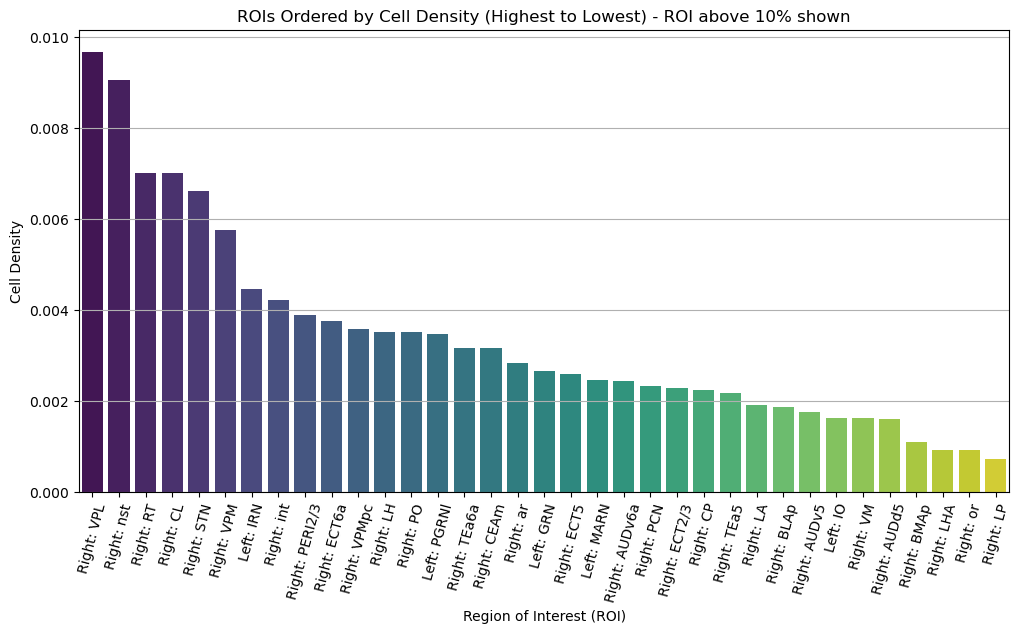

In [36]:
df_sorted = df.sort_values(by='Cell Density', ascending=False)
df_sorted = df_sorted[df_sorted["Synapses"] != 0]
percentage = 10
thr = df_sorted.iloc[0,1] * (percentage/100) #df_sorted.iloc[0,1] is the max
df_sorted = df_sorted[df_sorted["Synapses"] > thr]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='ROI', y='Cell Density', data=df_sorted, palette='viridis')
plt.title(f'ROIs Ordered by Cell Density (Highest to Lowest) - ROI above {percentage}% shown')
plt.xlabel('Region of Interest (ROI)')
plt.ylabel('Cell Density')
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.show()

# Heat-Map Brain

In [1]:
import matplotlib.pyplot as plt
import os
import bg_atlasapi as bgh  # Import BrainGlobe's Heatmap object, assuming this is where it's from

#INPUT: folder where to save the images:
output_directory = "/run/user/1000/gvfs/smb-share:server=upcourtinenas,share=cervical/CERVICAL_ID/Gabriele/583/python_images"  # Replace with the correct directory
side = "right" #choose between "right" or "left"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

In [9]:
# Define regions of interest and output directory
regions = df.set_index('ROI')['Cell Density'].to_dict()

regions

# Take only left or right side --> heatmap do not take into accout lrft/right
if side == "right":
    temp = "Right: "
else:
    temp = "Left: "
regions = {key: value for key, value in regions.items() if temp in key}

# Function to remove specific substrings from dictionary keys
def clean_keys(d):
    # Create a new dictionary with cleaned keys
    cleaned_dict = {}
    for key, value in d.items():
        # Remove specific substrings
        new_key = key.replace("Left: ", "").replace("Right: ", "")
        cleaned_dict[new_key] = value
    return cleaned_dict
regions = clean_keys(regions)

regions

# take only regions that have values !=0
regions = {key: value for key, value in regions.items() if value != 0}

regions


{'SSp-bfd1': 5.247502844583833e-05,
 'SSp-bfd2/3': 6.309344454604491e-05,
 'SSp-bfd4': 0.00014126502341345982,
 'SSp-bfd5': 0.00032096197736279864,
 'SSp-bfd6a': 0.000565639525623018,
 'SSp-bfd6b': 0.0008381834469246525,
 'SSs1': 0.00011696023686118825,
 'SSs2/3': 6.0858160927234936e-05,
 'SSs4': 0.00012385204634543574,
 'SSs5': 0.0007426245370427671,
 'SSs6a': 0.0009450621645124585,
 'SSs6b': 0.0008992131884600974,
 'AUDd1': 0.0001801568084861063,
 'AUDd2/3': 0.00023948914787584014,
 'AUDd4': 0.0001749692831702879,
 'AUDd5': 0.0015984935918762872,
 'AUDd6a': 0.002127395004816602,
 'AUDp1': 0.0002079650618696059,
 'AUDv1': 0.0006576449733504321,
 'AUDv2/3': 0.0005840071187394052,
 'AUDv4': 0.0005923330068614202,
 'AUDv5': 0.0017573858236036694,
 'AUDv6a': 0.002432120503942548,
 'AUDv6b': 0.0017644593769988017,
 'VISam1': 2.8363161925291432e-05,
 'VISam2/3': 0.00014592335740460716,
 'VISam4': 0.00014103178856514259,
 'VISam5': 0.0003222514635587303,
 'VISam6a': 0.0004651712008931287,
 '

## 2D

<Figure size 640x480 with 0 Axes>

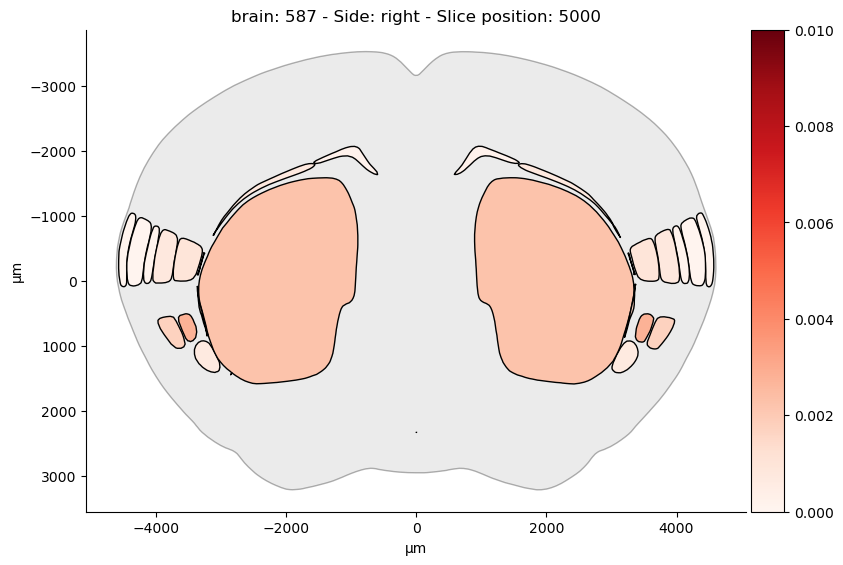

<Figure size 640x480 with 0 Axes>

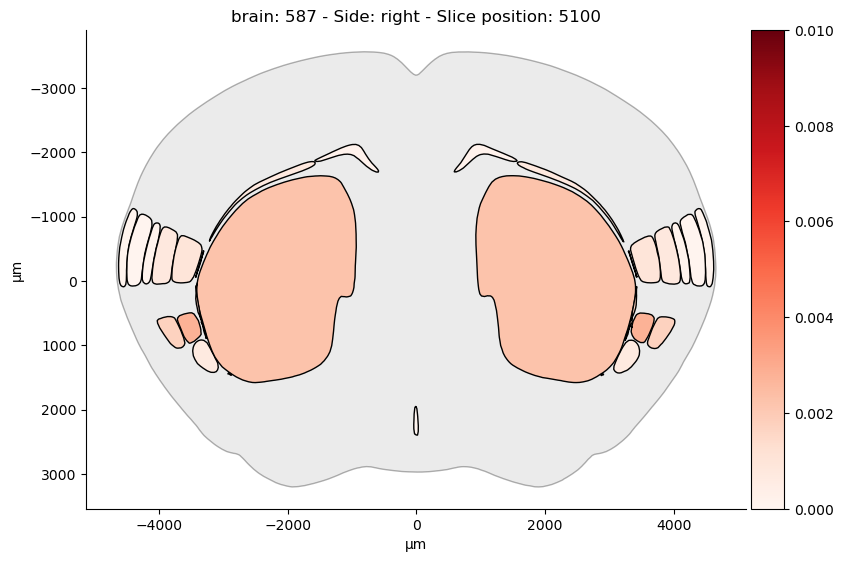

<Figure size 640x480 with 0 Axes>

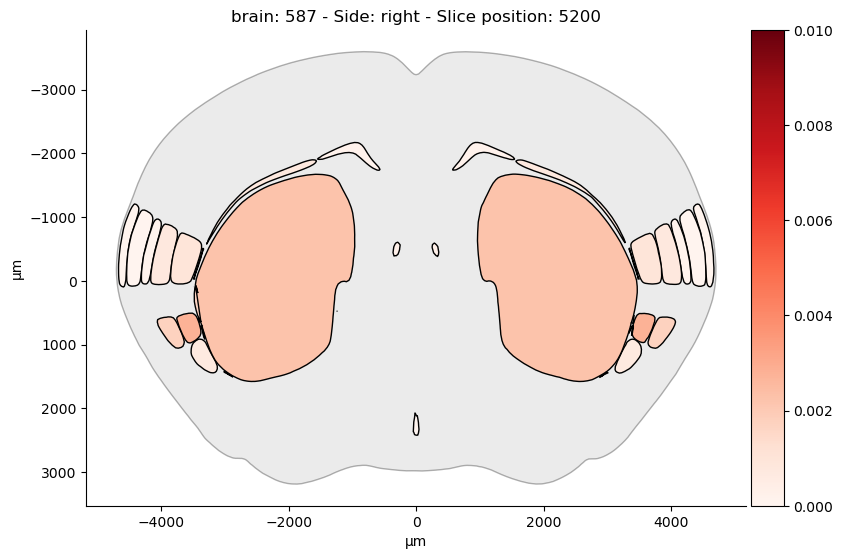

<Figure size 640x480 with 0 Axes>

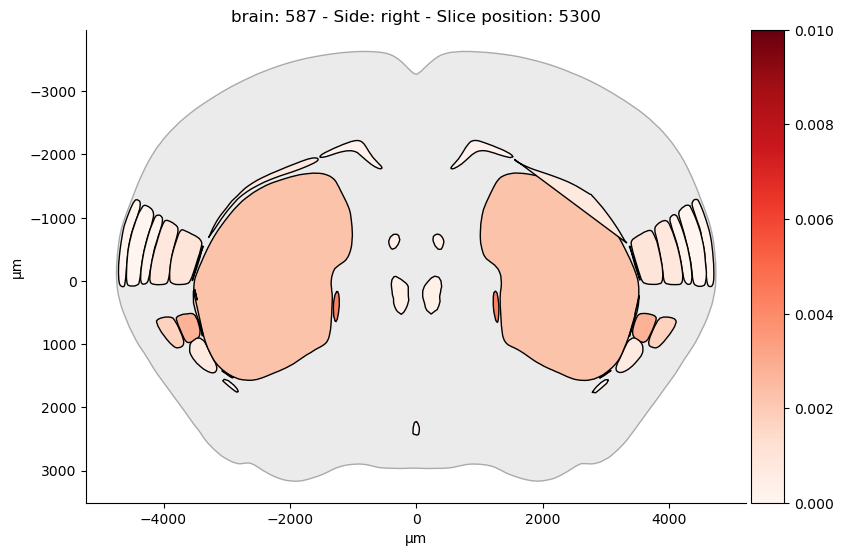

<Figure size 640x480 with 0 Axes>

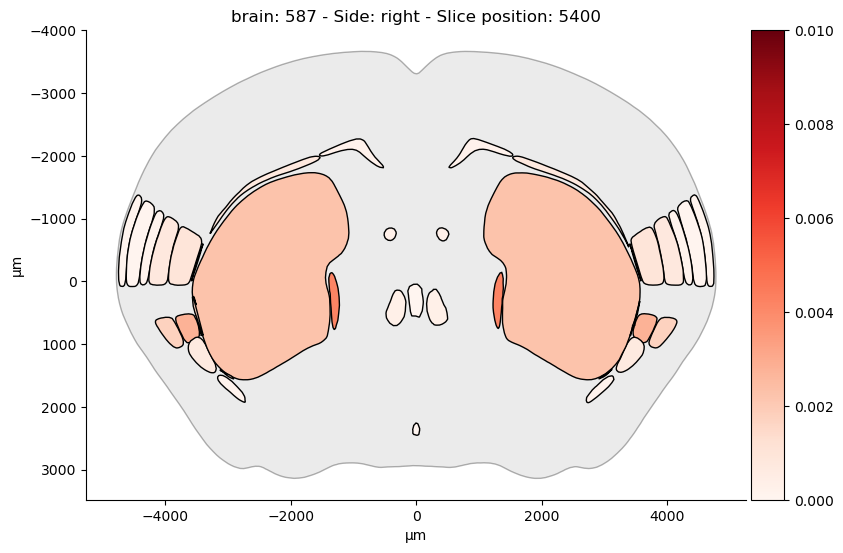

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [10]:
import brainglobe_heatmap as bgh

# Iterate over cuts range
for cut in range(5000, 13000, 100):
    plt.figure()  # Create a new figure each iteration
    
    # Create Heatmap object
    f = bgh.Heatmap(
        regions,
        position=cut,
        orientation="frontal",  # Adjust orientation as needed
        title=f"brain: {brain_id} - Side: {side} - Slice position: {cut}",
        vmin=0,
        vmax=0.01,
        cmap='Reds',
        atlas_name="allen_mouse_25um",
        format='2D',
        thickness=2000,  
    )
    
    # Plot the heatmap
    fig = f.plot(show_legend=False, xlabel='µm', ylabel='µm', hide_axes=False)
    
    # Save the figure as PDF
    fig.savefig(os.path.join(output_directory, f'{brain_id}-{side}-{cut}.pdf'), dpi=100)
    
    # Save as SVG
    # fig.savefig(os.path.join(output_directory, f'heatmap_{cut}.svg'), dpi=100)


## 3D

In [1]:
# Necessary for running in jupyter
import vedo
vedo.settings.default_backend= 'vtk'

bgh.Heatmap(
    regions,
    position=(
        5000
    ),
    orientation="horizontal",  # 'frontal' or 'sagittal', or 'horizontal' or a tuple (x,y,z)
    title="horizontal view",
    vmin=0,
    vmax=0.01,
    cmap='Reds',
    format="3D",
).show()

# Create a scene
#from brainrender import Scene
#popup_scene = Scene(atlas_name='allen_mouse_50um', title='popup') #put insde the atlas
#popup_scene.render()  # press 'Esc' to close

NameError: name 'bgh' is not defined

# 3D our cell detections

In [12]:
dir = "/home/gabri/Desktop/test_abba/587/results"
import glob
#from bg_atlasapi.bg_atlas import BrainGlobeAtlas
verbose = True

detections_csv_files = glob.glob(dir+'/*measurements.tsv')
if (verbose) : print('\n'.join(detections_csv_files[:5]))

df = []

# here you can use detections_csv_files[:10] to process only few files and go faster
for file in detections_csv_files : 
    df.append( pd.read_csv(file , sep='\t', header=(0) ) )
    
big_frame = pd.concat(df, ignore_index=True)

# Here we'll keep only the image, the parent region, coordinates and Mean Fluorescent value in Cy3 channel
filtered_df = big_frame[ ['Image', 'Parent', 'Atlas_X', 'Atlas_Y', 'Atlas_Z', 'Cell: CY3 mean']]
filtered_df[:] # Display a subset of cells to check that we collected the right columns

cy3_filtered_df = filtered_df[filtered_df[ 'Cell: CY3 mean'] > 100 ]

cy3_pos_cells = np.array( cy3_filtered_df[['Atlas_X', 'Atlas_Y','Atlas_Z']] , float ) * 1000

print(cy3_pos_cells)

#create lists from cells table - note swapping X and Y axes to match brainrender orientation
X = cy3_filtered_df['Atlas_X'].tolist()#200
Y = cy3_filtered_df['Atlas_Y'].tolist()#-6000
Z = cy3_filtered_df['Atlas_Z'].tolist()#10000

AtlasRes = 1000
X = [element * AtlasRes for element in X]
Y = [element * AtlasRes for element in Y]
Z = [element * AtlasRes for element in Z]
pts = [[x, y, z] for x, y, z in zip(X, Y, Z)]
coordinates = np.vstack(pts)

print("\n\n")
print(coordinates)


R_x = np.array([
    [1, 0, 0],
    [0, 0, -1],
    [0, 1, 0]
])

R_y = np.array([
    [0, 0, 1],
    [0, 1, 0],
    [-1, 0, 0]
])

R_z = np.array([
    [0, -1, 0],
    [1, 0, 0],
    [0, 0, 1]
])

#coordinates = coordinates @ R_z.T



# Specify the file name
#import csv
#filename = "/home/gabri/Desktop/test_abba/587/results/numbers_output.csv"
#with open(filename, mode='w', newline='') as file:
#    writer = csv.writer(file)
#    writer.writerows(cy3_pos_cells)


import numpy as np
# Necessary for running in jupyter
import vedo
vedo.settings.default_backend= 'vtk'

from brainrender import Scene
from brainrender.actors import Points

# Display the Allen Brain mouse atlas.
scene = Scene(atlas_name="allen_mouse_50um", title="Cells in primary visual cortex")

# Display a brain region
#primary_visual = scene.add_brain_region("VISp", alpha=0.2)

# Create a Points actor
cells = Points(coordinates)

# Add to scene
scene.add(cells)


# Add to scene
scene.add(Points(np.array([[0,0,0]]), radius=1000))


# Add label to the brain region
#scene.add_label(primary_visual, "Primary visual cortex")

# Display the figure.
scene.render()

/home/gabri/Desktop/test_abba/587/results/measurements.tsv
[[ 2.156000e+02 -6.098670e+04  1.032067e+05]
 [ 2.157000e+02 -6.099030e+04  1.032061e+05]
 [ 2.173000e+02 -6.106230e+04  1.032662e+05]
 ...
 [ 9.010000e+01 -5.688850e+04  1.067408e+05]
 [ 9.610000e+01 -5.713050e+04  1.068005e+05]
 [ 9.250000e+01 -5.699680e+04  1.068184e+05]]



[[ 2.156000e+02 -6.098670e+04  1.032067e+05]
 [ 2.157000e+02 -6.099030e+04  1.032061e+05]
 [ 2.173000e+02 -6.106230e+04  1.032662e+05]
 ...
 [ 9.010000e+01 -5.688850e+04  1.067408e+05]
 [ 9.610000e+01 -5.713050e+04  1.068005e+05]
 [ 9.250000e+01 -5.699680e+04  1.068184e+05]]
